### <b> Dominik Szot <br> Laboratorium 04 <br> Efekt Rungego </b>

<b> Zadanie 1. </b> Wyznacz wielomiany interpolujące funkcje

$$ 
    f_1(x) = \frac {1} {1+25x^2} \ na \ przedziale \ [-1, 1],
$$

$$ 
    f_2(x) = \exp( \cos(x)) \ na \ przedziale \ [0, 2\pi],
$$

używając:
* wielomianów Lagrange’a z równoodległymi węzłami $ x_j = x_0 + jh, \ j = 0,1,...,n $, gdzie $ h = (x_n − x_0)/n $

* kubicznych funkcji sklejanych z równoodległymi węzłami $ x_j = x_0+jh, \ j = 0,1,...,n $, gdzie $ h = (x_n − x_0)/n $

* wielomianów Lagrange’a z węzłami Czebyszewa 

$$
    x_j = \cos(θ_j) \,\  θj = \frac {2j + 1} {2(n+1)} \pi, \ 0 \leq j \leq n.
$$

* Dla funkcji Rungego, $ f_1(x)$, z $ n = 12 $ węzłami interpolacji przedstaw na wspólnym wykresie funkcję 
$ f_1(x) $ oraz wyznaczone wielomiany interpolacyjne i funkcję sklejaną. <br> 
W celu stworzenia wykresu wykonaj próbkowanie funkcji $ f_1(x) $ i wielomianów interpolacyjnych na $ 10 $ razy gęstszym zbiorze
(próbkowanie jednostajne w $ x $ dla węzłów równoodległych, jednostajne w $ \theta $
dla węzłów Czebyszewa). <br> 
Pamiętaj o podpisaniu wykresu i osi oraz o legendzie.

* Wykonaj interpolację funkcji $ f_1(x) $ i $ f_2(x) $ z $ n = 4,5,...,50 $ węzłami interpolacji, 
używając każdej z powyższych trzech metod interpolacji. Ewaluację funkcji, wielomianów interpolacyjnych oraz 
funkcji sklejanych przeprowadź na zbiorze 500 losowo wybranych punktów z dziedziny funkcji. 
Stwórz dwa rysunki, jeden dla $ f_1(x) $, drugi dla $ f_2(x) $. 
Na każdym rysunku przedstaw razem wykresy normy wektora błędów (czyli długości wektora) na tym zbiorze
punktów w zależności od liczby węzłów interpolacji, n, dla każdej z trzech
metod interpolacji. <br>
Która metoda interpolacji jest najbardziej dokładna, a która najmniej?

<b><i>Uwaga 1. </b></i> Transformacja węzłów Czebyszewa z przedziału $ [−1, 1] $ na $ [a, b] $ dana
jest wzorem $ x = a + (b − a) ∗ (r + 1)/2 $, gdzie r jest punktem Czebyszewa.

<b><i>Uwaga 2. </b></i> Należy zaimplementować własnoręcznie interpolację Lagrange’a. Implementacja biblioteczna `scipy.interpolate.lagrange` jest niestablina numerycznie

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import matplotlib.ticker

from scipy import interpolate

In [68]:
function_01 = lambda x : 1/(1 + 25*x**2)
function_02 = lambda x : np.exp(np.cos(x))

Implementacja interpolacji Lagrange'a 

In [69]:
def lagrange_interpolation(x_values, y_values, x):
    result = 0
    for j in range(len(x_values)):
        coefficient = 1
        for k in range(len(y_values)):
            if j != k:
                coefficient *= (x-x_values[k])/(x_values[j] - x_values[k])

        result += coefficient * y_values[j]

    return result

<b> Wielomiany Czebyszewa </b> <br>
Reprezentacja trygonometryczna. <br>
Wiemy, że: 
    $$ ∀x ∈ [−1, 1] \ ∃ \phi \ ∈ [0, π] : cos ϕ = x $$
    $$ Dla \ x ∈ [−1, 1] \ podstawmy \ ϕ = arccos x $$ 

i definiujemy wielomiany Czebyszewa: <br>
    $$ T_n(x) = cos[n \arccos(x)] $$

Z tożsamości trygonometrycznej: 
    $$ cos(nϕ) + cos[(n − 2)ϕ] = 2 cos[(n − 1)ϕ] · cos ϕ $$ 
    $$ cos(nϕ) = 2 cos[(n − 1)ϕ] · cos ϕ − cos[(n − 2)ϕ] $$

Wynika relacja rekurencyjna: 
    $$ T_n(x) = 2xT_{n−1}(x) − T_{n−2}(x), \ dla \ n > 2 $$

$ T_n(x) $ ma w $ [-1, 1] $ n miejsc zerowych :
$$ 
    x_k = cos( \frac {(2k+1) \pi} {n2}), \ k = 0,1,...,n-1
$$

Jako węzły interpolacji należy wziąć zera wielomianu $ T_{n+1}(x) $

In [70]:
# Generowanie węzłów Czebyszewa
def get_chebyshev_points(n):
    return np.array([np.cos(np.pi*(2*i+1)/(2*n)) for i in range(n)])

In [71]:
# Transformacja węzłów czebyszewa na przedział [a,b]
def get_transformed_cebyshev_points(n, a, b):
    f = lambda x: a + (b-a) *(x+1) / 2
    return np.array([f(i) for i in n])

Algorytm interpolacji Lagrange'a węzłami $T_{n+1}(x)$

In [72]:
def lagrange_polynomial_with_chebyshev_nodes(function, n:int, a:int, b:int, points = None) -> tuple:
    interpolation_nodes = get_transformed_cebyshev_points(get_chebyshev_points(n), a, b)
    interpolation_values = np.array([function(interpolation_nodes[i]) for i in range(len(interpolation_nodes))])
    
    if points == None:
        points = np.array([a + i*(b-a)/(10*n-1) for i in range(n*10)])
         
    values = np.array([lagrange_interpolation(interpolation_nodes, interpolation_values, points[i]) for i in range(len(points))])
    
    return points, values

Algorytm interpolacji Lagrange'a z węzłami równoodległymi

In [73]:
def lagrange_polynomial_with_equidistant_nodes(function, n:int, a:int, b:int, points = None) -> tuple:
    lagrange_interpolation_nodes = np.array([a + i * (b-a)/(n-1) for i in range(n)])
    lagrange_interpolation_values = np.array([function(lagrange_interpolation_nodes[i]) for i in range(n)])

    if points == None:
        points = np.array([a + i * (b-a)/(10*n-1) for i in range(10*n)])
        
    values = np.array([lagrange_interpolation(lagrange_interpolation_nodes, lagrange_interpolation_values, points[i]) for i in range(len(points))])

    return points, values

Kubuczne funkcje sklejane. <br> <br>
Funkcję $ s(x) = s(x, \Delta n) $ określoną na [a,b] nazywamy funkcją sklejaną stopnia n gdy:
* $ s(x) $ jest wielomianem stopnia m <= m na każdym $ [x_{i}, x_{i+1}] $
* $ s(x) \in C^{m-1}[a,b]$ 

Dla $ x \in [x_i, x_{i+1}]$: <br>
$$
    y(x) = y_i + \frac {y_{i+1} - y_i} {x_{i+1} - x_i} (x - x_i) = \frac {x_{i+1} - x} {x_{i+1} - x_i} y_i + \frac {x-x_i} {x_{i+1} - x_i}y_{i+1}(*) 
$$

Dla $ x \in [x_{i-1}, x_{i}]$: <br>
$$
    y(x) = \frac {x_{i} - x} {x_{i} - x_{i-1}} y_{i-1} + \frac {x-x_{i-1}} {x_{i} - x_{i-1}}y_{i}
$$


In [74]:
def cubic_spine_functions(function, n:int, a:int, b:int, points = None) -> tuple:
    interpolation_nodes = np.array([a + i * (b-a)/(n-1) for i in range(n)])
    interpolation_values = np.array([function(interpolation_nodes[i]) for i in range(n)])
    
    tck = interpolate.splrep(interpolation_nodes, interpolation_values)
    
    if points == None:
        points = np.array([a + i * (b-a)/(10*n-1) for i in range(10*n)])
    
    values = np.array([interpolate.splev(points[i], tck) for i in range(len(points))])
    
    return points, values

In [75]:
from matplotlib.ticker import FormatStrFormatter

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}

def runge(function, n, a, b, title = ""):
    l1 = lagrange_polynomial_with_equidistant_nodes(function, n, a, b)
    l2 = cubic_spine_functions(function, n, a, b)
    l3 = lagrange_polynomial_with_chebyshev_nodes(function, n, a,b )
        
    plt.semilogy()
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.plot(l1[0], l1[1], color='r', label="Wielomian Lagrange'a z równoodległymi węzłami")
    plt.plot(l2[0], l2[1], color='g', label="Kubiczne funkcje składane z równoodległymi węzłami")
    plt.plot(l3[0], l3[1], color='b', label="Wielomian Lagrange'a z węzłami Czebyszewa")
    
    points = np.array([a + i * (b-a)/(10*n-1) for i in range(10*n)])
    values = np.array([function(points[i]) for i in range(len(points))])    
    
    plt.plot(points, values, color='black', label="Wartość rzeczywista")

    plt.xlabel("X",fontdict=font)
    plt.ylabel("Y",fontdict=font)
    plt.title(f"{title}", fontdict=font)
    plt.legend()
    

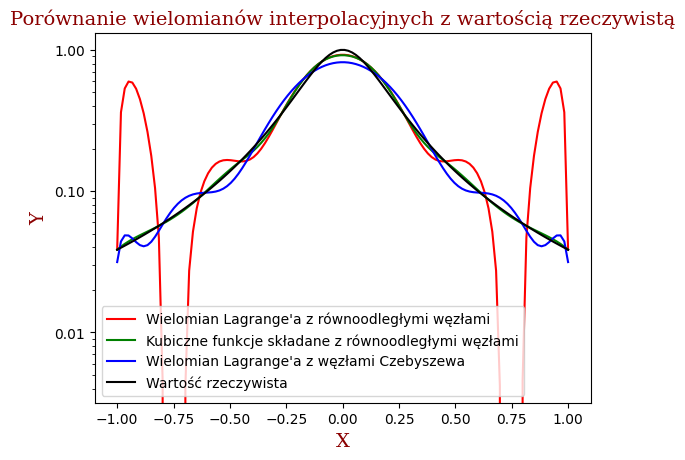

In [76]:
runge(function_01, 12, -1, 1, "Porównanie wielomianów interpolacyjnych z wartością rzeczywistą")

Wielomian Lagrange'a z równoogległymi węzłami dał wynik o najmniejszej dokładności (Efekt Rungego). 
Sposobem aby poradzić sobie z tym Efektem jest specialny dobór węzłów interpolacji (interpolacja Lagrange'a w węzłami Czebyszewa dała o wiele dokładniejsze wyniki) lub użycie interpolacji funkcjami sklejanymi, które dały najbardziej dokładny wynik.

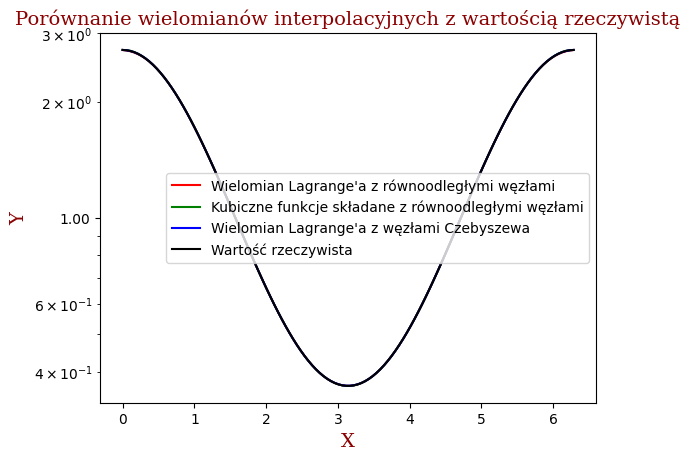

In [77]:
runge(function_02, 12, 0, 2*np.pi, "Porównanie wielomianów interpolacyjnych z wartością rzeczywistą")

In [78]:
def test_function(function, a, b, title=""):
    sampl = sorted(np.random.uniform(low=a, high=b, size=(500,)))
    actual_values = np.array([function(i) for i in sampl])
    
    lagrange_equidistant = [lagrange_polynomial_with_equidistant_nodes(function, i, a, b, sampl)[1] for i in range(4, 51)]
    cubic_spine = [cubic_spine_functions(function, i, a, b, sampl)[1] for i in range(4, 51)]
    lagrange_chebyshev = [lagrange_polynomial_with_chebyshev_nodes(function, i, a, b, sampl)[1] for i in range(4, 51)]
        
    lagrange_error = np.array([np.linalg.norm(np.absolute(np.array(i) - np.array(actual_values))) for i in lagrange_equidistant])
    cubic_spine_error = np.array([np.linalg.norm(np.absolute(np.array(i) - np.array(actual_values))) for i in cubic_spine])
    lagrange_chebyshev_error = np.array([np.linalg.norm(np.absolute(np.array(i) - np.array(actual_values))) for i in lagrange_chebyshev])

    plt.semilogy()
    plt.plot([i for i in range(4, 51)], lagrange_error, color='r', label="Długość wektora dla interpolacji Lagrange'a") 
    plt.plot([i for i in range(4, 51)], cubic_spine_error, color='g', label="Długość wektora dla kubicznych funkcji sklejanych")
    plt.plot([i for i in range(4, 51)], lagrange_chebyshev_error, color='b',label="Długość wektora dla Lagrange'a z węzłami Czebyszewa")
    plt.xlabel("Ilość węzłów interpolacji",fontdict=font)
    plt.ylabel("Norma wektora błędów",fontdict=font)
    plt.title(f"{title}",fontdict=font)
    plt.legend()

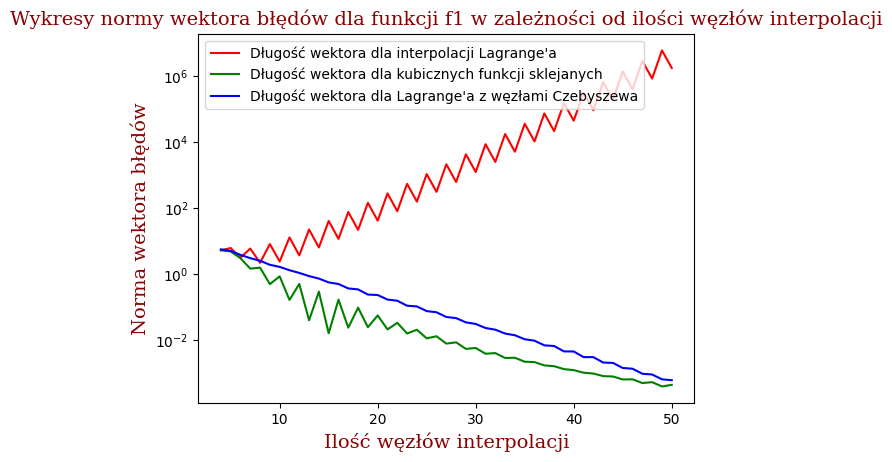

In [79]:
test_function(function_01, -1, 1, "Wykresy normy wektora błędów dla funkcji f1 w zależności od ilości węzłów interpolacji")

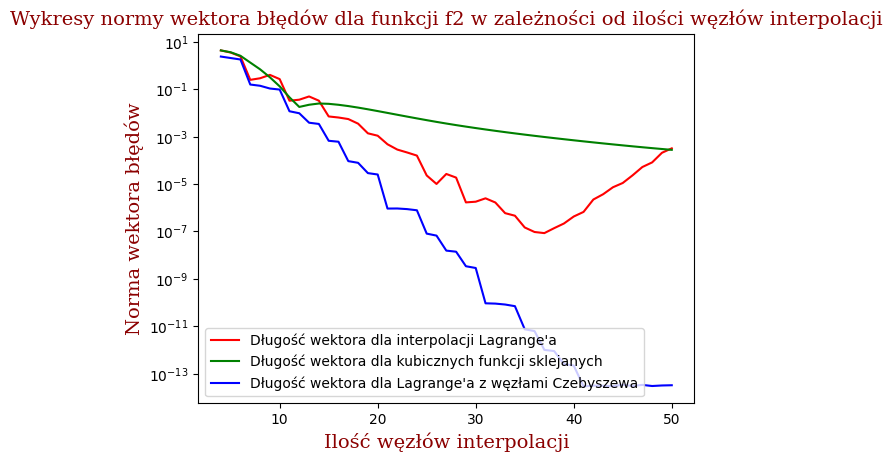

In [80]:
test_function(function_02, 0, 2*np.pi,  "Wykresy normy wektora błędów dla funkcji f2 w zależności od ilości węzłów interpolacji")

Dla funkcji $ f2 $ najdokładniejszym sposobem interpolacji okazała się interpolacja Lagrange'a z węzłami Czebyszewa. Interpolacja Lagrange'a z węzłami równoogległymi była odporna na efekt Rungego do $ \approx $ 35 węzła interpolacji. Funkcja sklejana poradziła również sobie dobrze z zadaniem.

Interpolacja Lagrange'a z równoogległymi węzłami okazała się nieodporna na Efekt Rungego. Aby poradzić sobie z tym efektem możemy użyć do interpolacji węzłów Czebyszewa, które znacząco poprawiają dokładność uodparniając na ten efekt. Innym sposobem są funkcje sklejane które również radzą sobie świetnie z interpolacją.